In [1]:
!pip install prophet


In [2]:
#import needed libs
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import numpy as np
import matplotlib.dates as mdates
from prophet import Prophet


In [3]:
#data_set.  Clean data WITHOUT outliers 
df = pd.read_csv('data_no_outliers.csv')
df = df.set_index('Txn_date')
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df

,Invoice_id,Cust_id,Product_Sub_category,Product_Category,Qty,Rate,Tax,Total_Amt,Store_type
Txn_date,,,,,,,,,
2016-01-02,80348907828,267124,Computers,Electronics,2,552,115.920,1219.920,TeleShop
2016-01-02,45127479223,273949,Kids,Books,1,366,38.430,404.430,Brick and Mortar
2016-01-02,21830961921,267482,Audio and video,Electronics,4,455,191.100,2011.100,Brick and Mortar
2016-01-02,35789988197,267508,Mens,Clothing,3,783,246.645,2595.645,e-Shop
2016-01-02,4947037174,271239,Electric appliances,Home and kitchen,3,228,71.820,755.820,e-Shop
...,...,...,...,...,...,...,...,...,...
2018-12-31,26100869804,273836,Cameras,Electronics,3,843,265.545,2794.545,e-Shop
2018-12-31,83963970126,274655,Kids,Clothing,5,213,111.825,1176.825,e-Shop
2018-12-31,51849180620,273963,Cameras,Electronics,3,617,194.355,2045.355,e-Shop


In [4]:
#resample
df_daily = df.resample('D').sum().reset_index()


/var/folders/wd/2sf_363j2qgdyy46qr3rysph0000gn/T/ipykernel_4099/214196941.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df.resample('D').sum().reset_index()


In [5]:
df_daily

,Txn_date,Invoice_id,Cust_id,Qty,Rate,Tax,Total_Amt
0,2016-01-02,1107788615825,6220887,72,17305,5713.155,60124.155
1,2016-01-03,742164348049,3252878,40,7996,3108.315,32711.315
2,2016-01-04,1146571949749,6213473,75,18683,6595.155,69406.155
3,2016-01-05,879331792460,5955886,69,17788,5741.820,60425.820
4,2016-01-06,788980970651,4582807,50,14008,3974.775,41829.775
...,...,...,...,...,...,...,...
1090,2018-12-27,758278844428,4603231,53,12797,4135.845,43524.845
1091,2018-12-28,1012601138841,4889662,56,13460,4365.375,45940.375
1092,2018-12-29,684682791456,4867255,51,14332,4282.005,45063.005
1093,2018-12-30,837086611250,4611188,50,15661,4789.365,50402.365


In [61]:
zero = (df_daily['Total_Amt'] == 0).any()
negatives = (df_daily['Total_Amt'] < 0).any()

print(zero)
print(negatives)

True
False


In [6]:
#rename columns
df_prophet = df_daily.rename(columns={'Txn_date': 'ds', 'Total_Amt': 'y'})


In [7]:
#model
m = Prophet(daily_seasonality=True)


In [8]:
#fit the model
m.fit(df_prophet)


15:42:58 - cmdstanpy - INFO - Chain [1] start processing
15:42:58 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
#creating df to hold prediction
future = m.make_future_dataframe(periods=365) #  next year


In [10]:
forecast = m.predict(future)


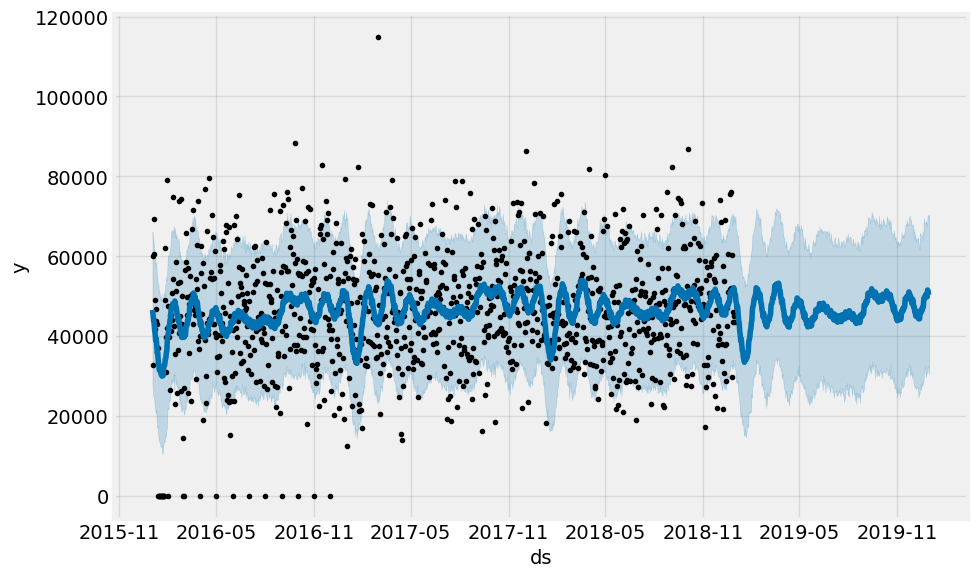

In [11]:
#plot the forecast
fig1 = m.plot(forecast)


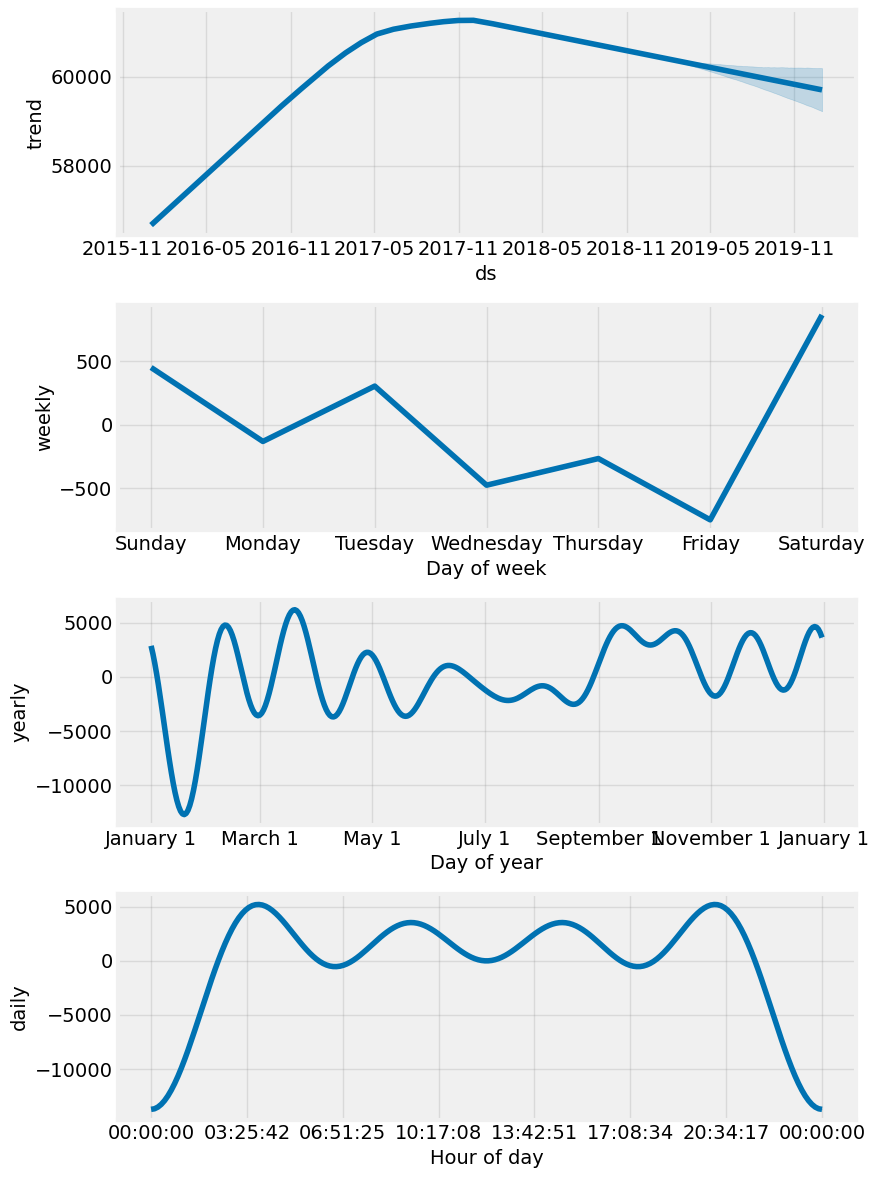

In [12]:
fig2 = m.plot_components(forecast)


In [13]:
# categories
unique_categories = df['Product_Category'].unique()
unique_categories

array(['Electronics', 'Books', 'Clothing', 'Home and kitchen', 'Footwear',
       'Bags'], dtype=object)

In [14]:
# Initialize a dictionary to store the models
models = {}

In [15]:
for category in unique_categories:
    # Filter the data
    df_filtered = df[df['Product_Category'] == category]
    df_daily = df_filtered.resample('D').sum().reset_index()
    
    df_prophet = df_daily.rename(columns={'Txn_date': 'ds', 'Total_Amt': 'y'})

    # Initialize and fit the model
    m = Prophet(daily_seasonality=True)
    m.fit(df_prophet)

    # Store the model
    models[category] = m

/var/folders/wd/2sf_363j2qgdyy46qr3rysph0000gn/T/ipykernel_4099/1178625639.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df_filtered.resample('D').sum().reset_index()
15:43:00 - cmdstanpy - INFO - Chain [1] start processing
15:43:00 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/wd/2sf_363j2qgdyy46qr3rysph0000gn/T/ipykernel_4099/1178625639.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df_filtered.resample('D').sum().reset_index()
15:43:00 - cmdstanpy - INFO - Chain [1] start processing
15:43:00 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/wd/2sf_36

In [16]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-02,56662.885110,27938.181704,66197.216479,56662.885110,56662.885110,-10145.270574,-10145.270574,-10145.270574,-13720.6146,...,865.693648,865.693648,865.693648,2709.650377,2709.650377,2709.650377,0.0,0.0,0.0,46517.614536
1,2016-01-03,56672.340701,25520.400031,64574.405738,56672.340701,56672.340701,-11340.377998,-11340.377998,-11340.377998,-13720.6146,...,451.671433,451.671433,451.671433,1928.565169,1928.565169,1928.565169,0.0,0.0,0.0,45331.962703
2,2016-01-04,56681.796292,24706.992835,63573.958287,56681.796292,56681.796292,-12817.825313,-12817.825313,-12817.825313,-13720.6146,...,-131.196523,-131.196523,-131.196523,1033.985810,1033.985810,1033.985810,0.0,0.0,0.0,43863.970979
3,2016-01-05,56691.251883,24318.216026,61944.063296,56691.251883,56691.251883,-13375.871251,-13375.871251,-13375.871251,-13720.6146,...,305.005798,305.005798,305.005798,39.737550,39.737550,39.737550,0.0,0.0,0.0,43315.380631
4,2016-01-06,56700.707474,23109.456494,60519.441750,56700.707474,56700.707474,-15234.133525,-15234.133525,-15234.133525,-13720.6146,...,-475.981980,-475.981980,-475.981980,-1037.536946,-1037.536946,-1037.536946,0.0,0.0,0.0,41466.573948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2019-12-27,59712.031904,30770.685615,67383.534395,59243.729182,60196.345683,-9824.341081,-9824.341081,-9824.341081,-13720.6146,...,-749.170703,-749.170703,-749.170703,4645.444222,4645.444222,4645.444222,0.0,0.0,0.0,49887.690823
1456,2019-12-28,59709.955059,32339.452912,70285.031156,59238.721306,60195.680016,-8201.186277,-8201.186277,-8201.186277,-13720.6146,...,865.693648,865.693648,865.693648,4653.734674,4653.734674,4653.734674,0.0,0.0,0.0,51508.768782
1457,2019-12-29,59707.878215,32526.947527,69540.008998,59233.713430,60194.436769,-8734.667681,-8734.667681,-8734.667681,-13720.6146,...,451.671433,451.671433,451.671433,4534.275486,4534.275486,4534.275486,0.0,0.0,0.0,50973.210534
1458,2019-12-30,59705.801371,30461.288508,70465.960355,59228.705554,60193.193523,-9570.645072,-9570.645072,-9570.645072,-13720.6146,...,-131.196523,-131.196523,-131.196523,4281.166051,4281.166051,4281.166051,0.0,0.0,0.0,50135.156299


In [39]:
# Initialize a dictionary to store the forecasts
forecasts = {}

for category, model in models.items():
    # Create future dataframe
    future = model.make_future_dataframe(periods=365)

    # Predict
    forecast = model.predict(future)

    # Store the forecast
    forecasts[category] = forecast


Forecast for category: Electronics


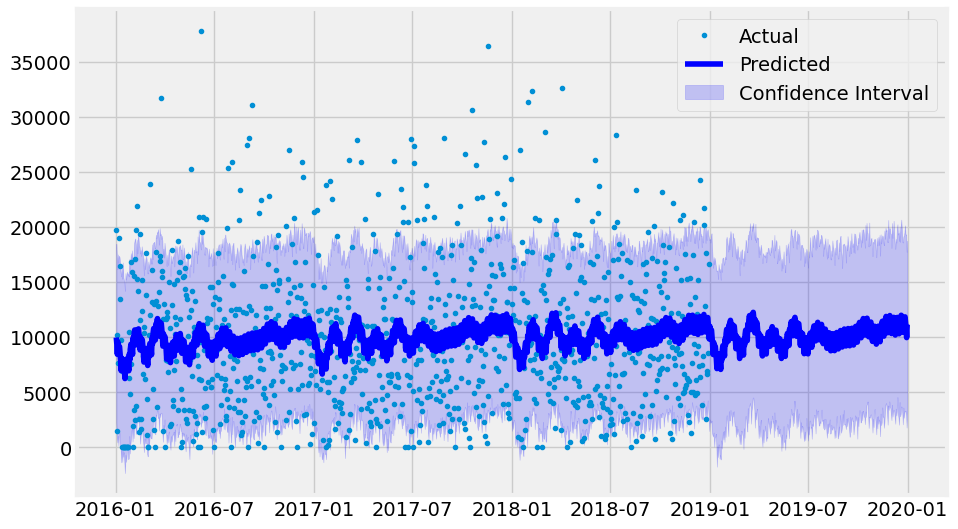

Forecast for category: Books


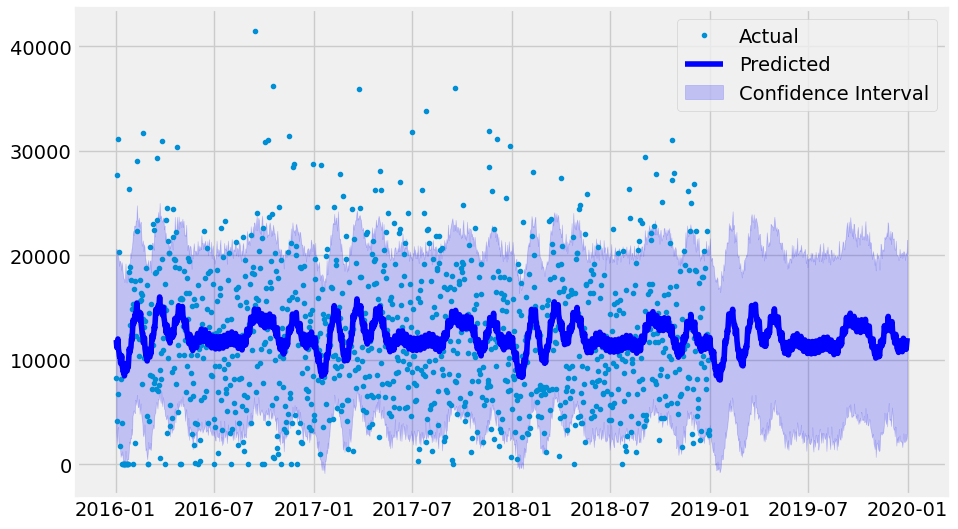

Forecast for category: Clothing


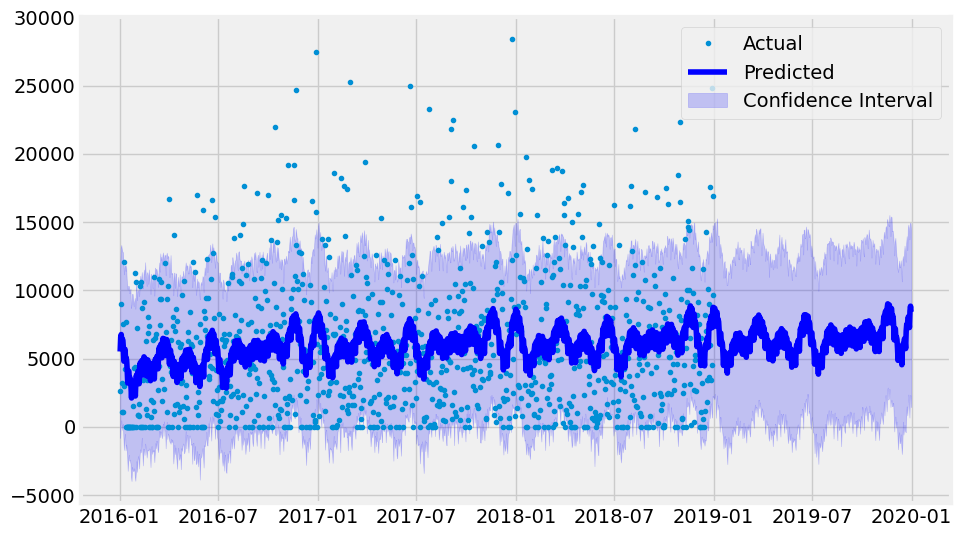

Forecast for category: Home and kitchen


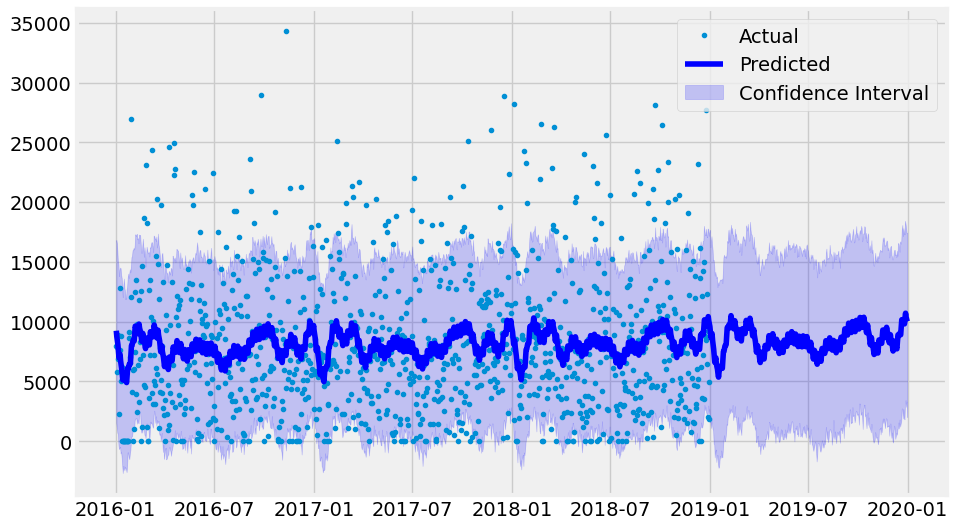

Forecast for category: Footwear


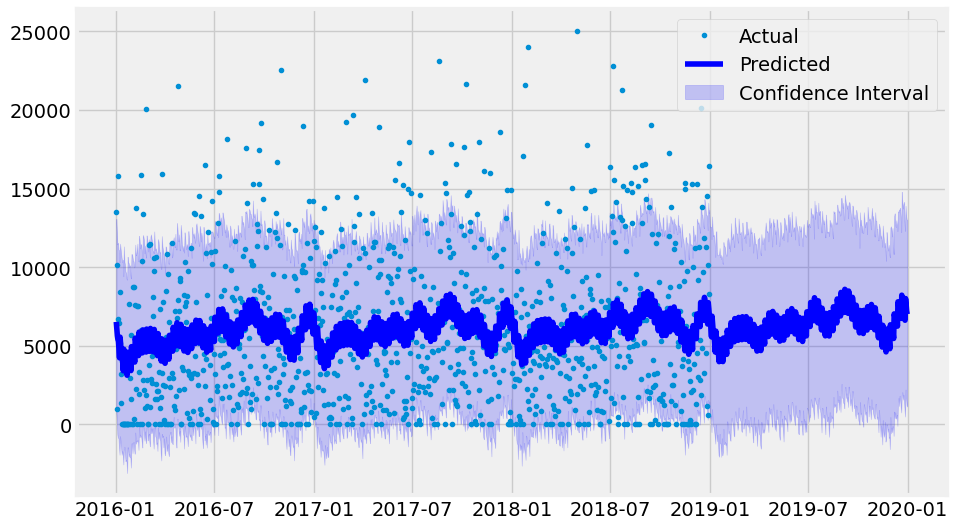

Forecast for category: Bags


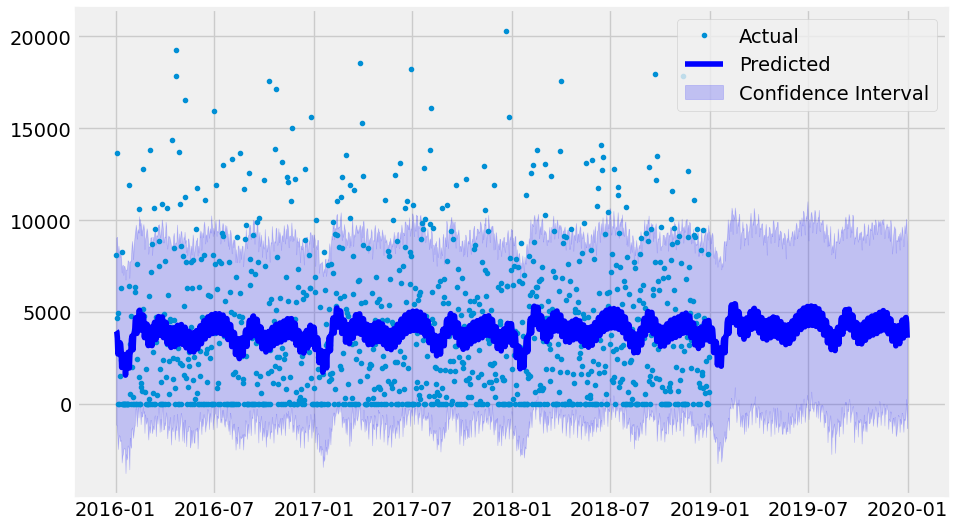

In [40]:

for category, forecast in forecasts.items():
    print(f"Forecast for category: {category}")
    model = models[category]
    
    fig = plt.figure(facecolor='w', figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(model.history['ds'], model.history['y'], '.', label='Actual')
    ax.plot(forecast['ds'], forecast['yhat'], ls='-', c='blue', label='Predicted')
    ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Confidence Interval')
    ax.legend(loc='best')
    plt.show()  


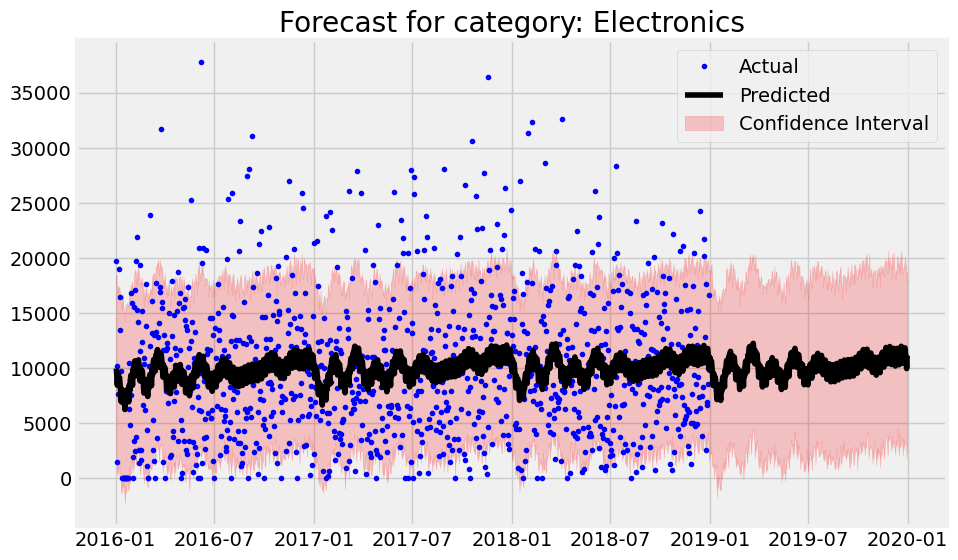

In [41]:
# Forecast for 'Electronics'
category = 'Electronics'
forecast = forecasts[category]
model = models[category]

fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(model.history['ds'], model.history['y'], '.', label='Actual', color='blue')
ax.plot(forecast['ds'], forecast['yhat'], ls='-', c='black', label='Predicted')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2, label='Confidence Interval')
ax.legend(loc='best')
plt.title(f"Forecast for category: {category}")
plt.show()

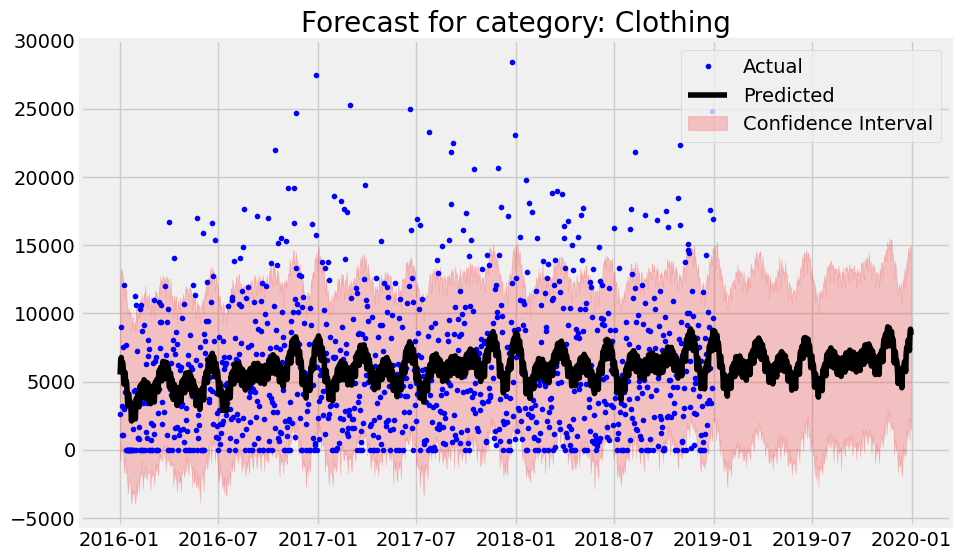

In [42]:
 # Forecast for 'Clothing'
category = 'Clothing'
forecast = forecasts[category]
model = models[category]

fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(model.history['ds'], model.history['y'], '.', label='Actual', color='blue')
ax.plot(forecast['ds'], forecast['yhat'], ls='-', c='black', label='Predicted')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2, label='Confidence Interval')
ax.legend(loc='best')
plt.title(f"Forecast for category: {category}")
plt.show()

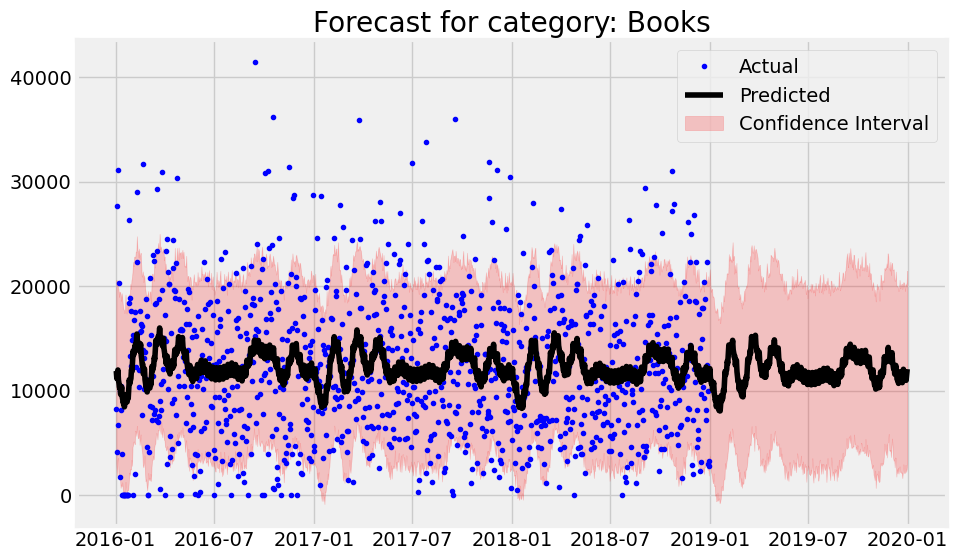

In [43]:
# Forecast for 'Books'
category = 'Books'
forecast = forecasts[category]
model = models[category]

fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(model.history['ds'], model.history['y'], '.', label='Actual', color='blue')
ax.plot(forecast['ds'], forecast['yhat'], ls='-', c='black', label='Predicted')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2, label='Confidence Interval')
ax.legend(loc='best')
plt.title(f"Forecast for category: {category}")
plt.show()

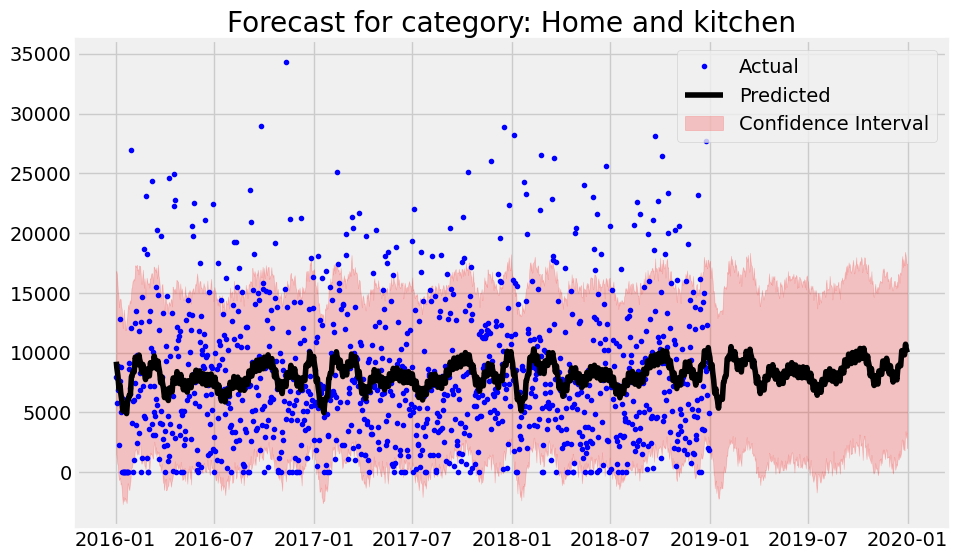

In [44]:
# Forecast for 'Home and kitchen'
category = 'Home and kitchen'
forecast = forecasts[category]
model = models[category]

fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(model.history['ds'], model.history['y'], '.', label='Actual', color='blue')
ax.plot(forecast['ds'], forecast['yhat'], ls='-', c='black', label='Predicted')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2, label='Confidence Interval')
ax.legend(loc='best')
plt.title(f"Forecast for category: {category}")
plt.show()

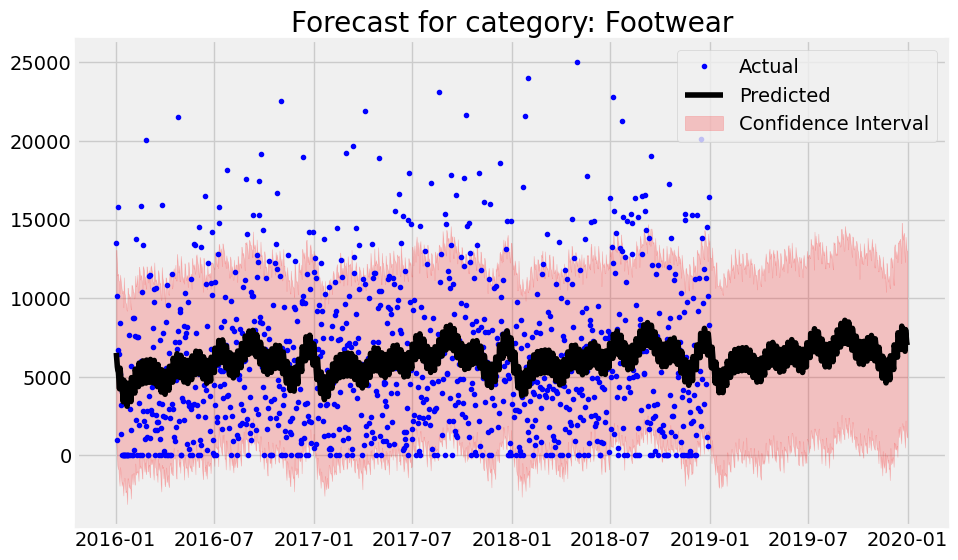

In [45]:
# Forecast for 'Footwear'
category = 'Footwear'
forecast = forecasts[category]
model = models[category]

fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(model.history['ds'], model.history['y'], '.', label='Actual', color='blue')
ax.plot(forecast['ds'], forecast['yhat'], ls='-', c='black', label='Predicted')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2, label='Confidence Interval')
ax.legend(loc='best')
plt.title(f"Forecast for category: {category}")
plt.show()

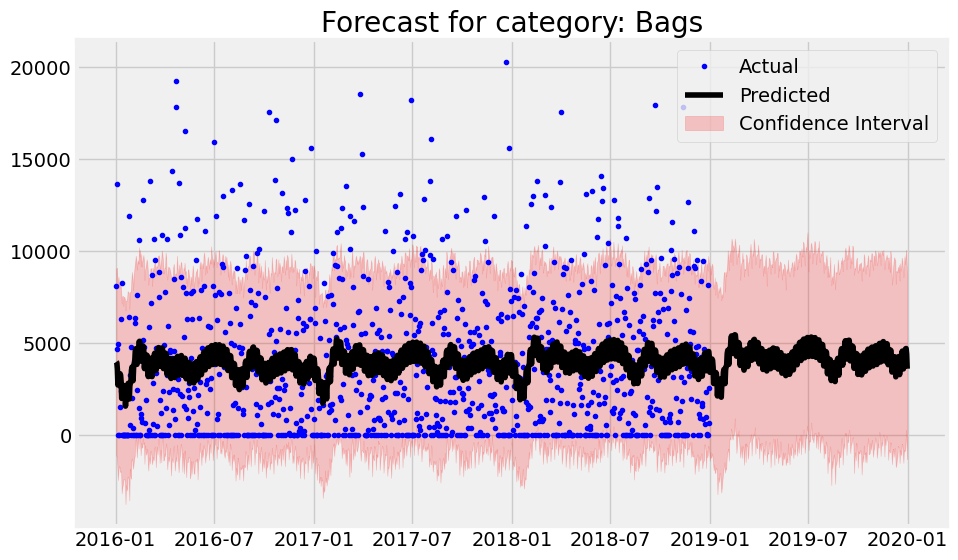

In [46]:
# Forecast for 'Bags'
category = 'Bags'
forecast = forecasts[category]
model = models[category]

fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(model.history['ds'], model.history['y'], '.', label='Actual', color='blue')
ax.plot(forecast['ds'], forecast['yhat'], ls='-', c='black', label='Predicted')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2, label='Confidence Interval')
ax.legend(loc='best')
plt.title(f"Forecast for category: {category}")
plt.show()

In [47]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-02,7239.381723,-1123.494452,9052.610943,7239.381723,7239.381723,-3260.849689,-3260.849689,-3260.849689,-3454.146027,...,366.362587,366.362587,366.362587,-173.066249,-173.066249,-173.066249,0.0,0.0,0.0,3978.532033
1,2016-01-03,7239.757264,-1157.632825,9096.735500,7239.757264,7239.757264,-3303.406761,-3303.406761,-3303.406761,-3454.146027,...,392.037714,392.037714,392.037714,-241.298447,-241.298447,-241.298447,0.0,0.0,0.0,3936.350503
2,2016-01-04,7240.132805,-1727.476925,8559.262633,7240.132805,7240.132805,-3662.537581,-3662.537581,-3662.537581,-3454.146027,...,111.701500,111.701500,111.701500,-320.093054,-320.093054,-320.093054,0.0,0.0,0.0,3577.595224
3,2016-01-05,7240.508346,-2448.442619,8008.172376,7240.508346,7240.508346,-4519.105056,-4519.105056,-4519.105056,-3454.146027,...,-656.672666,-656.672666,-656.672666,-408.286363,-408.286363,-408.286363,0.0,0.0,0.0,2721.403289
4,2016-01-06,7240.883887,-1895.377352,8603.814142,7240.883887,7240.883887,-4020.144665,-4020.144665,-4020.144665,-3454.146027,...,-61.553978,-61.553978,-61.553978,-504.444660,-504.444660,-504.444660,0.0,0.0,0.0,3220.739221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2019-12-27,7785.725953,-822.671851,9299.910547,7785.723637,7785.728529,-3591.032616,-3591.032616,-3591.032616,-3454.146027,...,-123.757322,-123.757322,-123.757322,-13.129267,-13.129267,-13.129267,0.0,0.0,0.0,4194.693338
1456,2019-12-28,7786.101438,-450.131979,9706.253414,7786.099106,7786.104028,-3098.047436,-3098.047436,-3098.047436,-3454.146027,...,366.362587,366.362587,366.362587,-10.263996,-10.263996,-10.263996,0.0,0.0,0.0,4688.054002
1457,2019-12-29,7786.476922,270.186011,10082.065383,7786.474575,7786.479527,-3080.776914,-3080.776914,-3080.776914,-3454.146027,...,392.037714,392.037714,392.037714,-18.668601,-18.668601,-18.668601,0.0,0.0,0.0,4705.700008
1458,2019-12-30,7786.852407,-653.994399,9322.595926,7786.850046,7786.855025,-3381.405794,-3381.405794,-3381.405794,-3454.146027,...,111.701500,111.701500,111.701500,-38.961267,-38.961267,-38.961267,0.0,0.0,0.0,4405.446613


In [48]:
df_daily

,Invoice_id,Cust_id,Qty,Rate,Tax,Total_Amt
Txn_date,,,,,,
2016-01-02,117643988025,546297,9,1574,770.595,8109.595
2016-01-03,30501471458,270632,5,847,444.675,4679.675
2016-01-04,146194651928,813260,13,2827,1295.280,13631.280
2016-01-05,32992559875,274470,4,1125,472.500,4972.500
2016-01-06,0,0,0,0,0.000,0.000
...,...,...,...,...,...,...
2018-12-27,16380694071,268284,1,71,7.455,78.455
2018-12-28,0,0,0,0,0.000,0.000
2018-12-29,114163072636,808678,11,2337,773.010,8135.010


In [56]:
#merging to df's
merged = df_daily.join(forecast[['yhat', 'yhat_lower', 'yhat_upper']], how = 'inner')


In [58]:
merged[['Total_Amt', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,Total_Amt,yhat,yhat_lower,yhat_upper
2016-01-02,8109.595,3978.532033,-1123.494452,9052.610943
2016-01-03,4679.675,3936.350503,-1157.632825,9096.735500
2016-01-04,13631.280,3577.595224,-1727.476925,8559.262633
2016-01-05,4972.500,2721.403289,-2448.442619,8008.172376
2016-01-06,0.000,3220.739221,-1895.377352,8603.814142


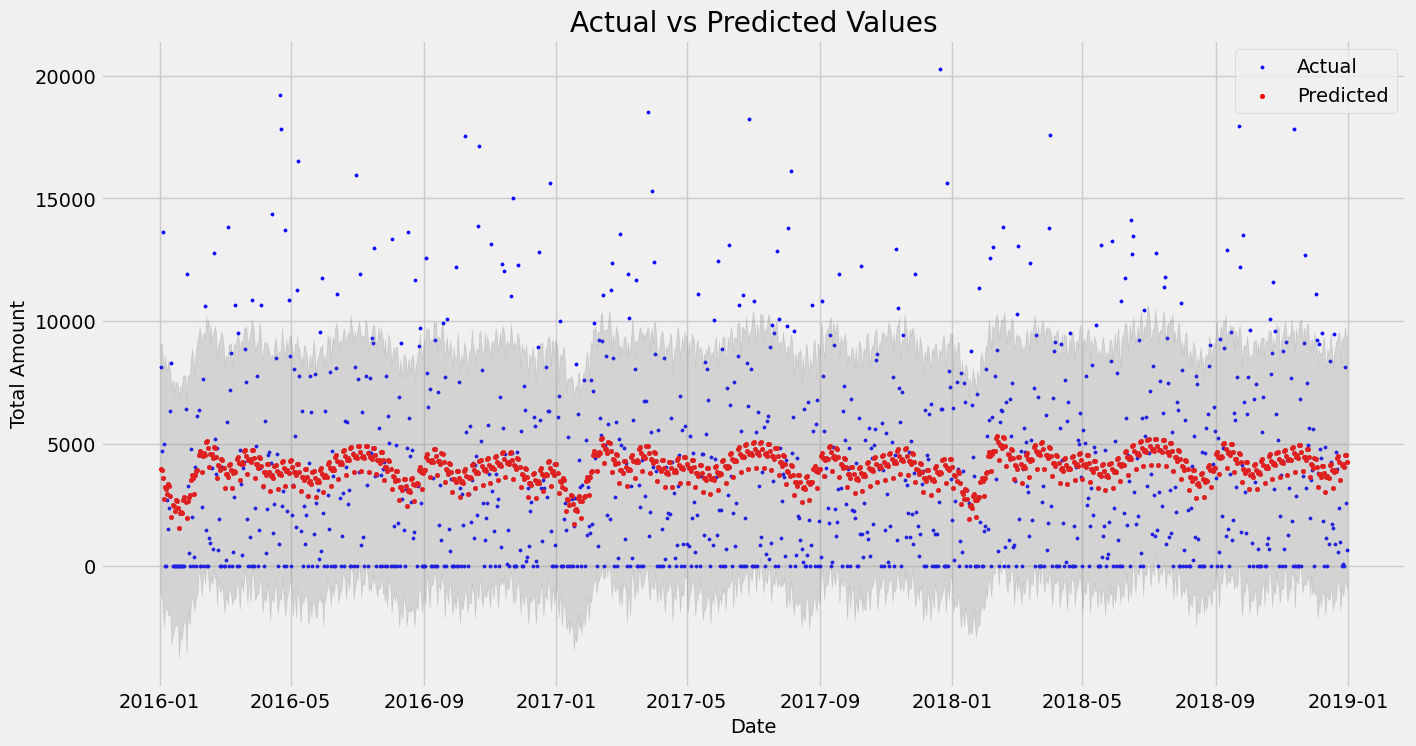

In [59]:

plt.figure(figsize=(15,8))

# Plot the actual data
plt.scatter(merged.index, merged['Total_Amt'], color='blue', label='Actual', s=5)

# Plot the predicted data
plt.scatter(merged.index, merged['yhat'], color='red', label='Predicted', s=10)
# plot the upper and lower boundaries of confidence intervals
plt.fill_between(merged.index, merged['yhat_lower'], merged['yhat_upper'], color='gray', alpha=0.25)

plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.title('Actual vs Predicted Values')
plt.legend()

plt.show()



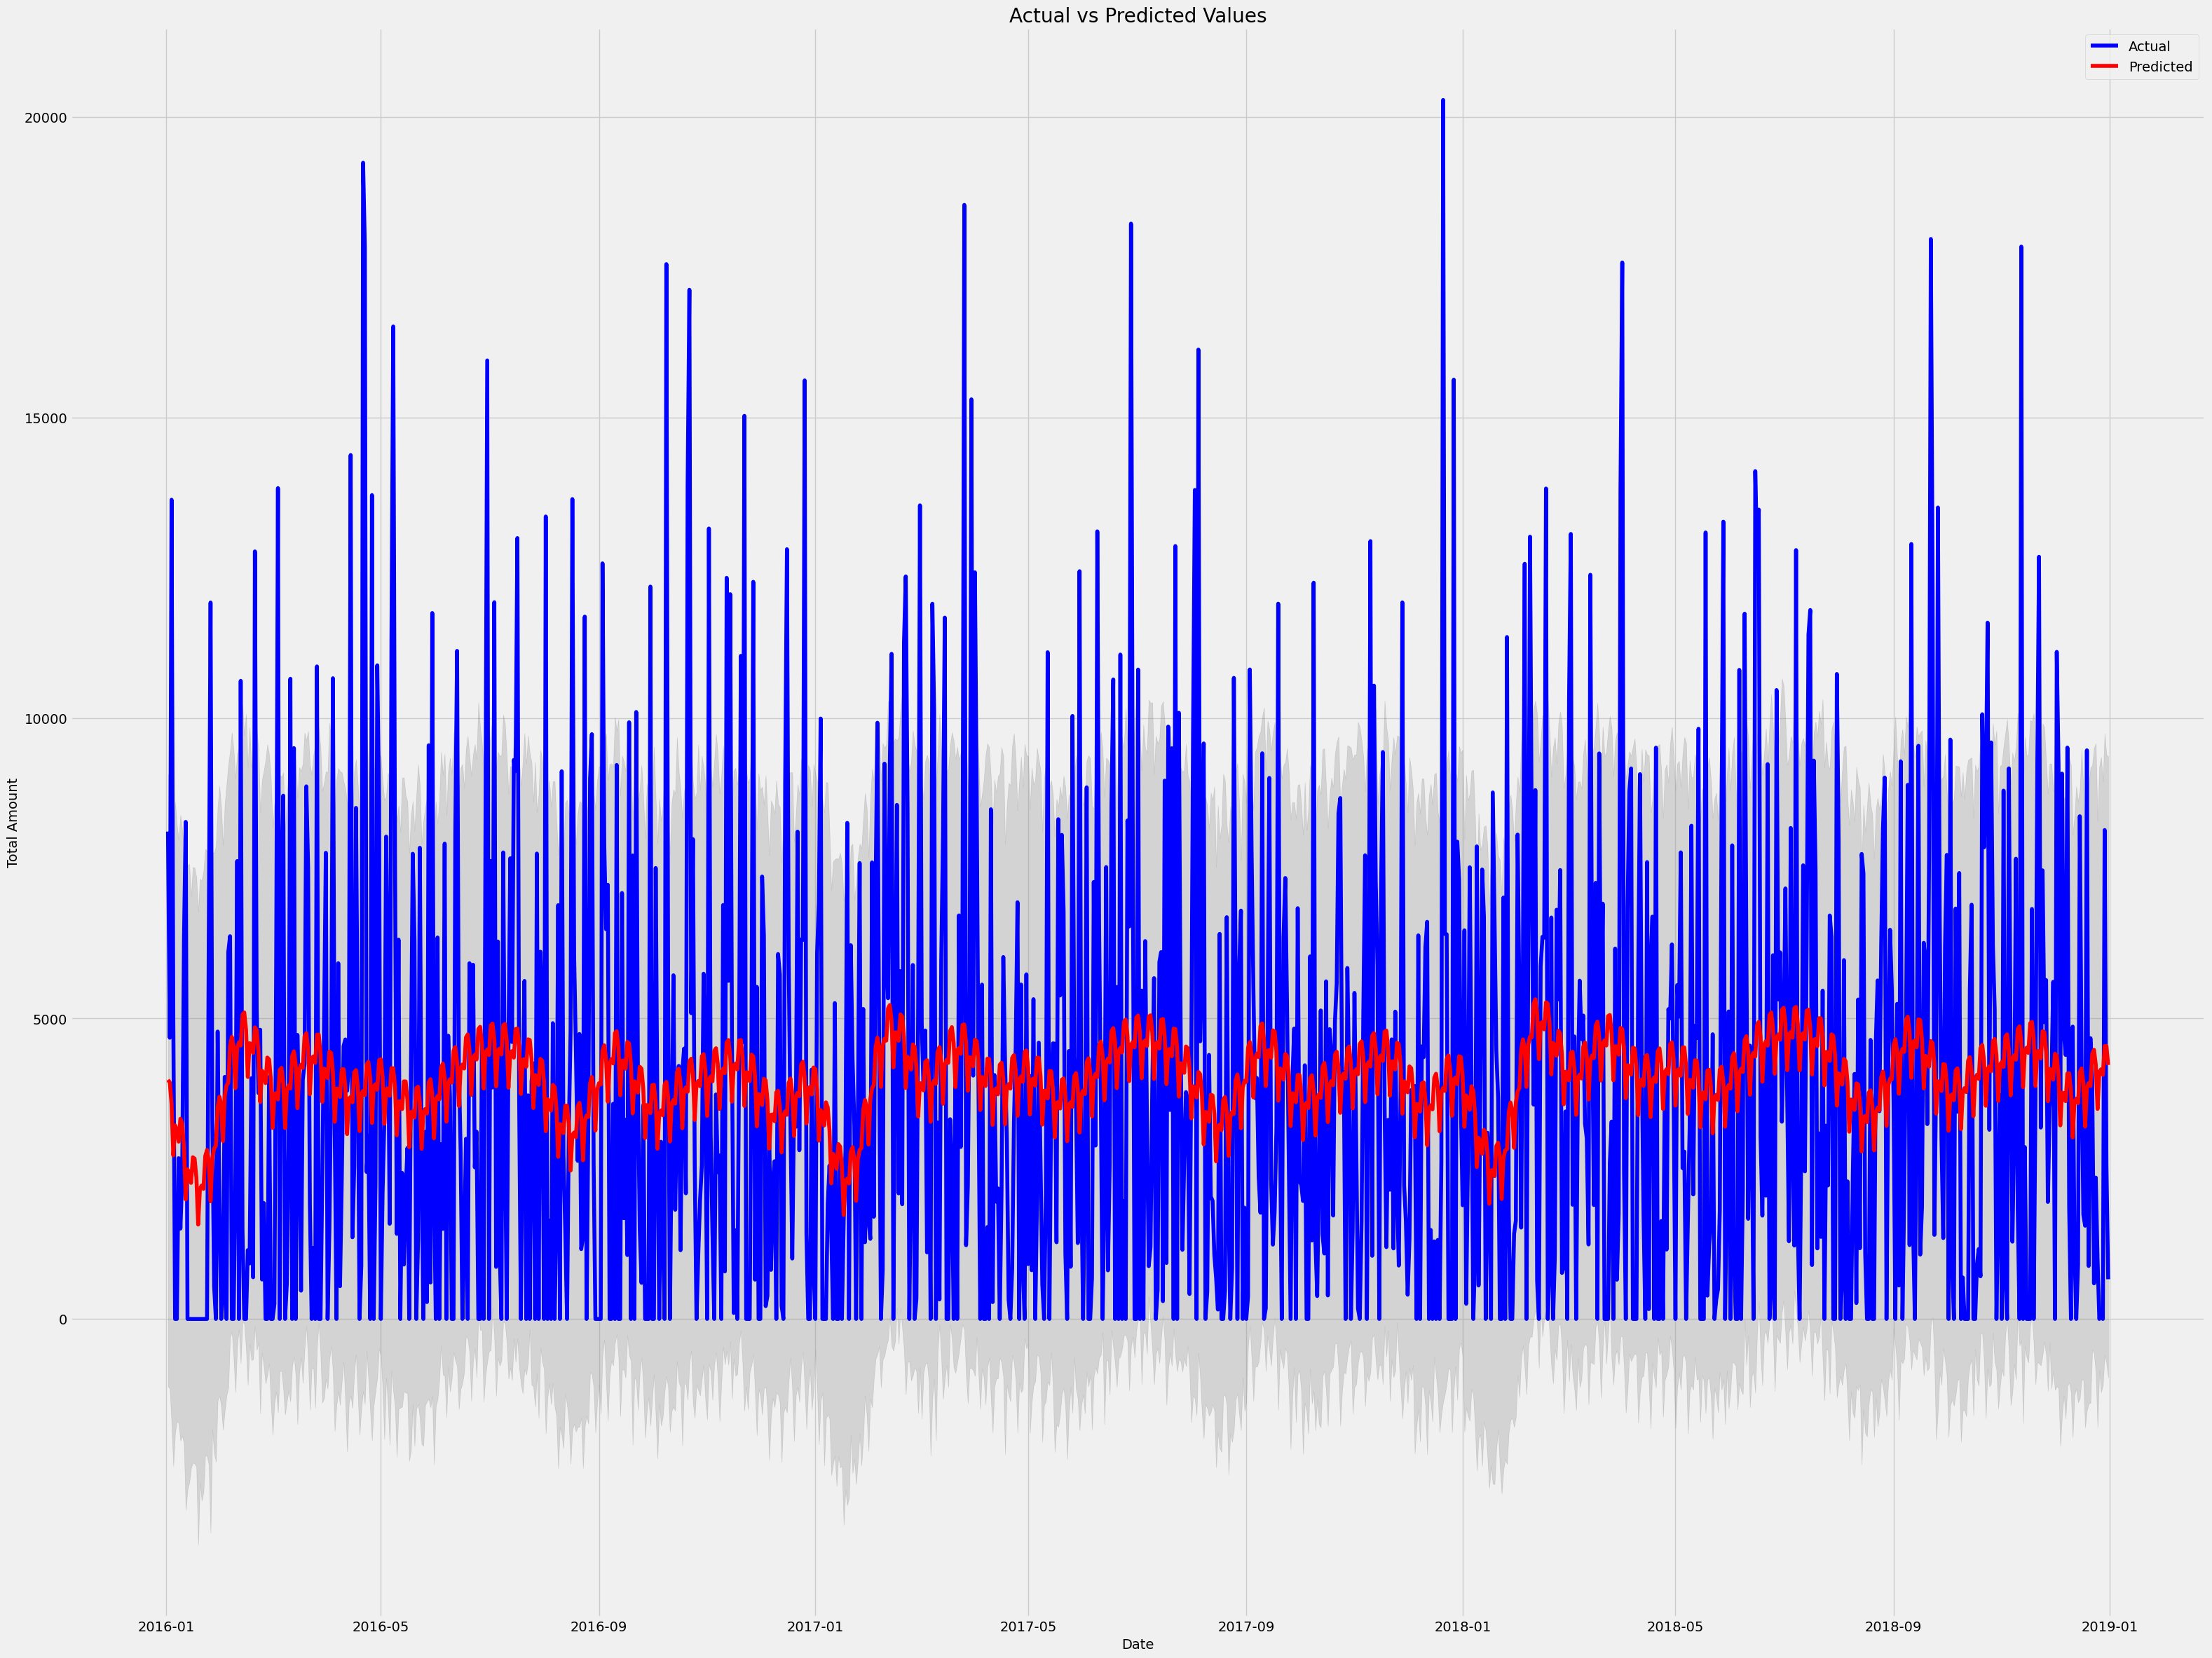

In [60]:
plt.figure(figsize=(35,28))

# plot the actual data
plt.plot(merged.index, merged['Total_Amt'], 'b-', label='Actual')

# plot the forecast 
plt.plot(merged.index, merged['yhat'], 'r-', label='Predicted')

# plot the upper and lower boundaries of confidence intervals
plt.fill_between(merged.index, merged['yhat_lower'], merged['yhat_upper'], color='gray', alpha=0.25)

plt.legend()
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.title('Actual vs Predicted Values')

plt.show()